In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
snowfall = pd.read_csv('snowfall.csv')
snowfall.head()

,Country or Territory,Station Name,WMO Station Number,National Station Id Number,Period,Element-Statistic Qualifier Code,Statistic Description,Unit,Jan,Jan Footnotes,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,UNITED STATES OF AMERICA,"BARROW/W. POST W. ROGERS, AK",70026.0,500546.0,1961-1990,NaN,Median Value,cm,4.3,NaN,...,14.0,NaN,6.6,NaN,5.1,NaN,-9999.9,2.0,-9999.9,2.0
1,UNITED STATES OF AMERICA,"KOTZEBUE/RALPH WIEN, AK",70133.0,505076.0,1961-1990,NaN,Median Value,cm,14.2,NaN,...,15.2,NaN,19.0,NaN,16.5,NaN,-9999.9,2.0,-9999.9,2.0
2,UNITED STATES OF AMERICA,BETTLES/FIELD AK,70174.0,500761.0,1961-1990,NaN,Median Value,cm,26.4,NaN,...,28.7,NaN,27.4,NaN,36.3,NaN,-9999.9,2.0,-9999.9,2.0
3,UNITED STATES OF AMERICA,"NOME, AK",70200.0,506496.0,1961-1990,NaN,Median Value,cm,17.3,NaN,...,10.4,NaN,27.4,NaN,22.9,NaN,-9999.9,2.0,-9999.9,2.0
4,UNITED STATES OF AMERICA,"BETHEL/BETHEL AIRPORT, AK",70219.0,500754.0,1961-1990,NaN,Median Value,cm,14.2,NaN,...,9.4,NaN,18.8,NaN,17.3,NaN,-9999.9,2.0,-9999.9,2.0


In [4]:
snow = pd.read_csv('noaa.csv')
snow.head()

,STATION,NAME,DATE,CDSD,EMSN,TAVG
0,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-01,0.0,3.6,19.8
1,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-02,0.0,2.7,23.7
2,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-03,0.0,5.0,39.1
3,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-04,35.0,1.1,53.3
4,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-05,93.0,0.0,62.5


In [5]:
Jan = snowfall['Jan'].mean()
Feb = snowfall['Feb'].mean()
Mar = snowfall['Mar'].mean()
Apr = snowfall['Apr'].mean()
May = snowfall['May'].mean()
Jun = snowfall['Jun'].mean()
Jul = snowfall['Jul'].mean()
Aug = snowfall['Aug'].mean()
Sep = snowfall['Sep'].mean()
Oct = snowfall['Oct'].mean()
Nov = snowfall['Nov'].mean()
Dec = snowfall['Dec'].mean()

In [6]:
Ice = pd.DataFrame({'snowfall': [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]})
Ice

,snowfall
0,33062.869373
1,32198.206103
2,32966.617077
3,35528.366069
4,36101.282979
5,30078.251064
6,28757.475980
7,28748.307559
8,32496.356439
9,35862.095017


In [15]:
snow.sort_values('EMSN')
snow

,STATION,NAME,DATE,CDSD,EMSN,TAVG
0,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-01,0.0,3.6,19.8
1,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-02,0.0,2.7,23.7
2,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-03,0.0,5.0,39.1
3,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-04,35.0,1.1,53.3
4,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-05,93.0,0.0,62.5
5,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-06,149.0,0.0,64.6
6,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-07,353.0,0.0,71.5
7,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-08,488.0,0.0,68.9
8,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-09,607.0,0.0,64.8
9,USC00200230,"ANN ARBOR U OF MICH, MI US",1985-10,609.0,0.0,53.2


In [7]:
monthly_emsn = snow.groupby('DATE').mean()['EMSN']
Jan = monthly_emsn.iloc[0]
Feb = monthly_emsn.iloc[1]
Mar = monthly_emsn.iloc[2]
Apr = monthly_emsn.iloc[3]
May = monthly_emsn.iloc[4]
Jun = monthly_emsn.iloc[5]
Jul = monthly_emsn.iloc[6]
Aug = monthly_emsn.iloc[7]
Sep = monthly_emsn.iloc[8]
Oct = monthly_emsn.iloc[9]
Nov = monthly_emsn.iloc[10]
Dec = monthly_emsn.iloc[11]

In [8]:
Ice['Max_sn'] = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
Ice

,snowfall,Max_sn
0,33062.869373,3.40
1,32198.206103,2.85
2,32966.617077,4.75
3,35528.366069,0.55
4,36101.282979,0.00
5,30078.251064,0.00
6,28757.475980,0.00
7,28748.307559,0.00
8,32496.356439,0.00
9,35862.095017,0.00


In [9]:
Ice['snowfall'] = Ice['snowfall']/1000
Ice

,snowfall,Max_sn
0,33.062869,3.40
1,32.198206,2.85
2,32.966617,4.75
3,35.528366,0.55
4,36.101283,0.00
5,30.078251,0.00
6,28.757476,0.00
7,28.748308,0.00
8,32.496356,0.00
9,35.862095,0.00


In [10]:
Ice['Max_sn'] = Ice['Max_sn'] * 10
Ice

,snowfall,Max_sn
0,33.062869,34.0
1,32.198206,28.5
2,32.966617,47.5
3,35.528366,5.5
4,36.101283,0.0
5,30.078251,0.0
6,28.757476,0.0
7,28.748308,0.0
8,32.496356,0.0
9,35.862095,0.0


In [12]:
Ice.sort_values('snowfall')
Ice

,snowfall,Max_sn
0,33.062869,34.0
1,32.198206,28.5
2,32.966617,47.5
3,35.528366,5.5
4,36.101283,0.0
5,30.078251,0.0
6,28.757476,0.0
7,28.748308,0.0
8,32.496356,0.0
9,35.862095,0.0


In [50]:
Ice.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Ice

,snowfall,Max_sn
Jan,33.062869,34.0
Feb,32.198206,28.5
Mar,32.966617,47.5
Apr,35.528366,5.5
May,36.101283,0.0
Jun,30.078251,0.0
Jul,28.757476,0.0
Aug,28.748308,0.0
Sep,32.496356,0.0
Oct,35.862095,0.0


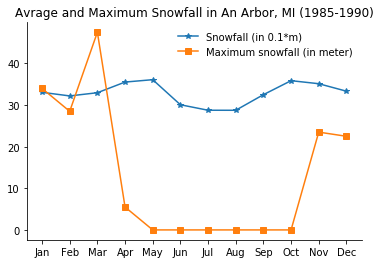

In [51]:
x = Ice.index.tolist()
y1 = Ice['snowfall'].tolist()
y2 = Ice['Max_sn'].tolist()

plt.plot(x, y1, '-*', label = "Snowfall (in 0.1*m)")
plt.plot(x, y2, '-s', label = "Maximum snowfall (in meter)")

plt.title('Avrage and Maximum Snowfall in An Arbor, MI (1985-1990)')

plt.legend(frameon=False)
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

plt.show()